In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from glob import glob
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from PIL import Image
np.random.seed(123)
from sklearn.model_selection import train_test_split

In [2]:
dataset= pd.read_csv('HAM10000_metadata.csv')
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
base_skin_dir = os.path.join('../', 'HAM10000')
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('', '*', '*.jpg'))}

In [4]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [5]:
dataset['path'] = dataset['image_id'].map(image_path.get)
dataset['cell_type'] = dataset['dx'].map(lesion_type_dict.get)
dataset['cell_codes'] = pd.Categorical(dataset['cell_type']).codes

In [6]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_codes
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,HAM10000\ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [7]:
dataset.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
cell_type        0
cell_codes       0
dtype: int64

In [8]:
dataset['age'].fillna((dataset['age'].mean()), inplace=True)

In [9]:
dataset.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
cell_type       0
cell_codes      0
dtype: int64

In [10]:
dataset['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

<AxesSubplot:xlabel='dx', ylabel='count'>

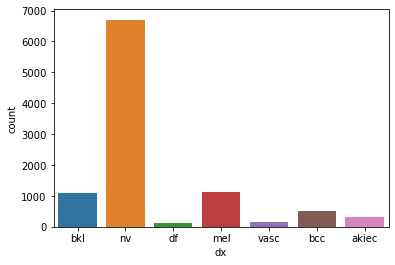

In [11]:
sns.countplot(x='dx', data=dataset)

In [12]:
dataset['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

<AxesSubplot:xlabel='dx_type', ylabel='count'>

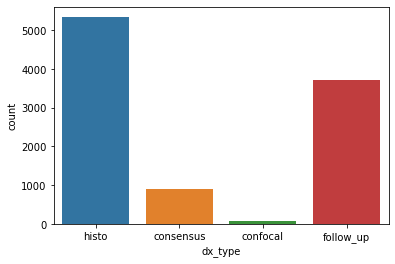

In [13]:
sns.countplot(x='dx_type', data=dataset)

In [14]:
dataset['age'].value_counts()

45.000000    1299
50.000000    1187
55.000000    1009
40.000000     985
60.000000     803
70.000000     756
35.000000     753
65.000000     731
75.000000     618
30.000000     464
80.000000     404
85.000000     290
25.000000     247
20.000000     169
5.000000       86
15.000000      77
51.863828      57
10.000000      41
0.000000       39
Name: age, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '10.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '20.0'),
  Text(5, 0, '25.0'),
  Text(6, 0, '30.0'),
  Text(7, 0, '35.0'),
  Text(8, 0, '40.0'),
  Text(9, 0, '45.0'),
  Text(10, 0, '50.0'),
  Text(11, 0, '51.863828077927295'),
  Text(12, 0, '55.0'),
  Text(13, 0, '60.0'),
  Text(14, 0, '65.0'),
  Text(15, 0, '70.0'),
  Text(16, 0, '75.0'),
  Text(17, 0, '80.0'),
  Text(18, 0, '85.0')])

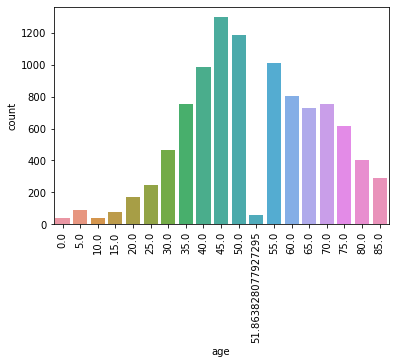

In [15]:
sns.countplot(x='age', data=dataset)
plt.xticks(rotation=90)

In [16]:
dataset['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

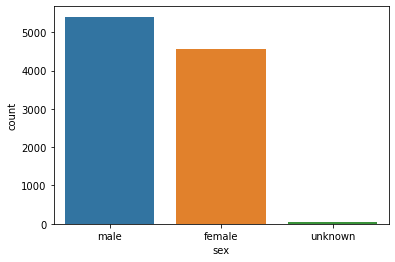

In [17]:
sns.countplot(x='sex', data=dataset)

In [18]:
dataset['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'scalp'),
  Text(1, 0, 'ear'),
  Text(2, 0, 'face'),
  Text(3, 0, 'back'),
  Text(4, 0, 'trunk'),
  Text(5, 0, 'chest'),
  Text(6, 0, 'upper extremity'),
  Text(7, 0, 'abdomen'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'lower extremity'),
  Text(10, 0, 'genital'),
  Text(11, 0, 'neck'),
  Text(12, 0, 'hand'),
  Text(13, 0, 'foot'),
  Text(14, 0, 'acral')])

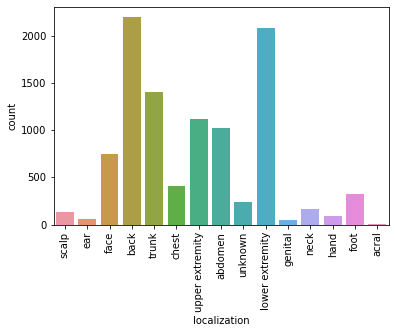

In [19]:
sns.countplot(x='localization', data=dataset)
plt.xticks(rotation=90)

In [20]:
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))

In [21]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_codes,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[191, 152, 194], [191, 153, 195], [192, 149,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[23, 13, 23], [25, 14, 28], [37, 24, 46], [6..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[186, 129, 140], [192, 136, 151], [198, 143,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,HAM10000\ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 11, 19], [36, 20, 30], [64, 38, 50], [9..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,HAM10000\ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[139, 95, 118], [158, 114, 138], [178, 133, ..."


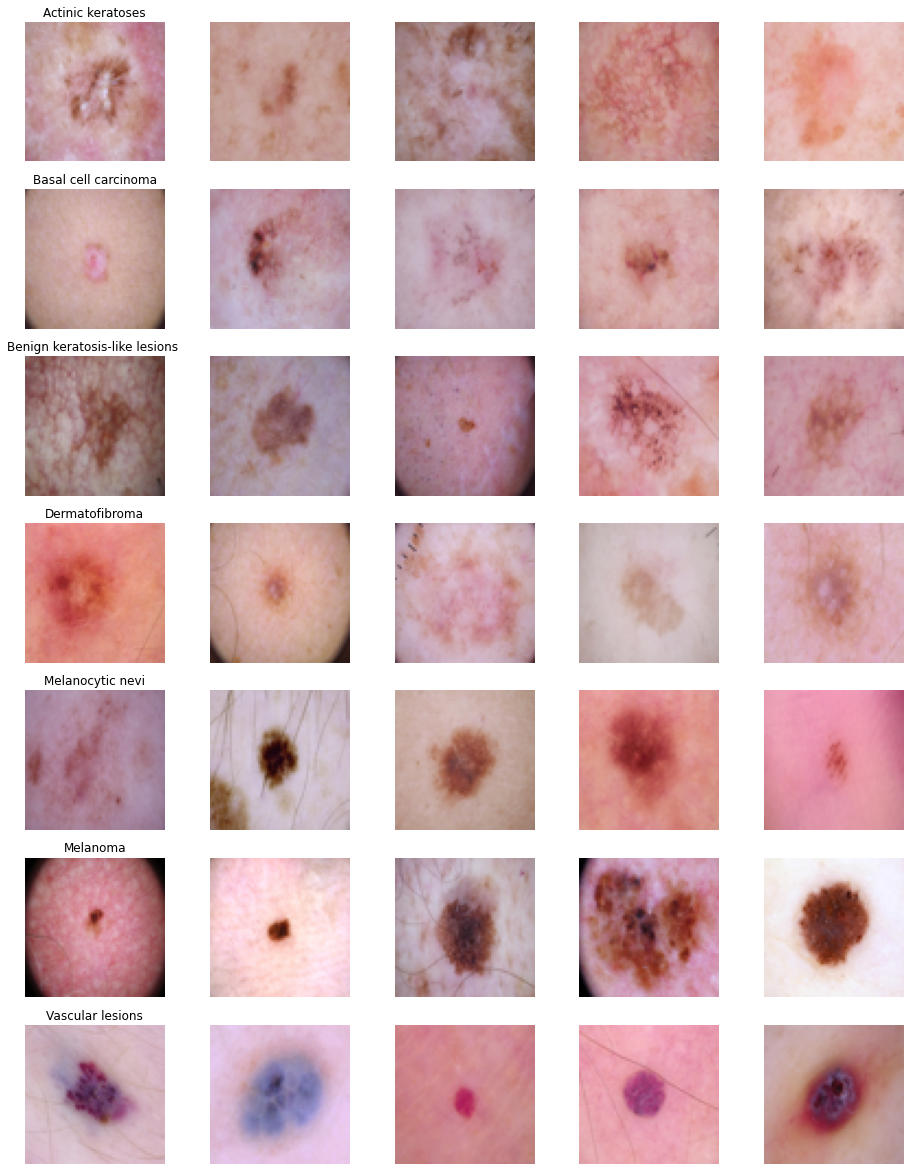

In [22]:
fig, m_axs = plt.subplots(7, 5, figsize = (4*4, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,dataset.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(7, random_state=1).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [23]:
features=dataset.drop(columns=['cell_codes'],axis=1)
target=dataset['cell_codes']

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.20,random_state=42)

In [25]:
x_train = np.asarray(x_train1['image'].tolist())
x_test = np.asarray(x_test1['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [26]:
y_train = to_categorical(y_train1, num_classes = 7)
y_test = to_categorical(y_test1, num_classes = 7)

In [27]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.10, random_state = 42)

In [28]:
x_train = x_train.reshape(x_train.shape[0], *(64, 64, 3))
x_test = x_test.reshape(x_test.shape[0], *(64, 64, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(64, 64, 3))

In [29]:
shape = (64, 64, 3)

classifier = Sequential()

classifier.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=shape, activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Dropout(0.10))

classifier.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=shape, activation='relu'))
classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Dropout(0.20))

classifier.add(Flatten())

classifier.add(Dropout(0.40))

classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(32,activation='relu'))

classifier.add(Dense(7,activation="softmax"))

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0

In [30]:
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
epochs = 25
batch_size = 16
history = classifier.fit(x_train,y_train, batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate,y_validate),
)

Epoch 1/25
451/451 [==============================] - 62s 136ms/step - loss: 0.9680 - accuracy: 0.6720 - val_loss: 0.9310 - val_accuracy: 0.6696
Epoch 2/25
451/451 [==============================] - 61s 135ms/step - loss: 0.8715 - accuracy: 0.6900 - val_loss: 0.8116 - val_accuracy: 0.7032
Epoch 3/25
451/451 [==============================] - 64s 141ms/step - loss: 0.8327 - accuracy: 0.6979 - val_loss: 0.8188 - val_accuracy: 0.6983
Epoch 4/25
451/451 [==============================] - 65s 145ms/step - loss: 0.7982 - accuracy: 0.7089 - val_loss: 0.9063 - val_accuracy: 0.7020
Epoch 5/25
451/451 [==============================] - 65s 143ms/step - loss: 0.7804 - accuracy: 0.7218 - val_loss: 0.8007 - val_accuracy: 0.7057
Epoch 6/25
451/451 [==============================] - 66s 146ms/step - loss: 0.7562 - accuracy: 0.7254 - val_loss: 0.7608 - val_accuracy: 0.7170
Epoch 7/25
451/451 [==============================] - 62s 137ms/step - loss: 0.7350 - accuracy: 0.7404 - val_loss: 0.7689 - val_ac

In [32]:
classifier.save("classify.h5")

In [34]:
loss, accuracy = classifier.evaluate(x_test, y_test)
loss_v, accuracy_v = classifier.evaluate(x_validate, y_validate)
print("Validation accuracy = ",accuracy_v)
print("Test accuracy = ",accuracy)

26/26 [==============================] - 1s 30ms/step - loss: 0.7565 - accuracy: 0.7531
Validation accuracy =  0.7531172037124634
Test accuracy =  0.7438841462135315
